In [9]:
import os
import pandas as pd

In [10]:
# Save the original environment
original_env = os.environ.copy()

In [11]:
data = pd.read_csv("Mall_Customers.csv");
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [12]:
# Drop Customer ID column
# import os
# os.environ['OMP_NUM_THREADS'] = '1'
data = data.drop('CustomerID', axis=1)
# Encode Gender
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [67]:
#  Standardize
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# Elbow Method to find the optimal number of clusters
import os

# Save the original environment
original_env = os.environ.copy()
try:
    os.environ['OMP_NUM_THREADS'] = '1'
    
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    inertia = []
    k_values = range(1, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
finally:
    os.environ.clear()
    os.environ.update(original_env)

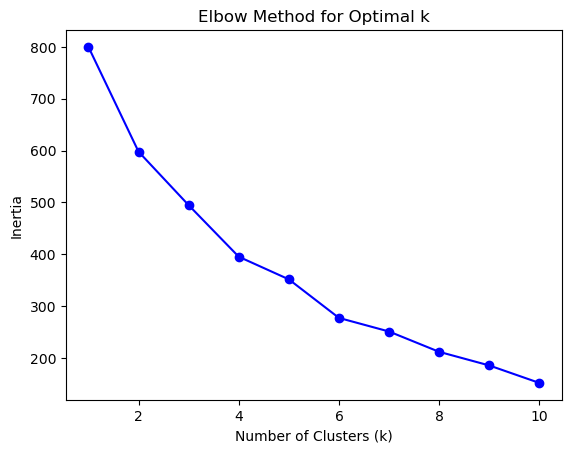

In [69]:
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [226]:
from sklearn.cluster import KMeans
# Set the number of clusters (use the optimal k from the Elbow method)
k = 10

# Apply k-means clustering with the chosen number of clusters
kmeans = kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# display the first few rows of the dataset with cluster labels
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        1
1       0   21                  15                      81        1
2       1   20                  16                       6        2
3       1   23                  16                      77        8
4       1   31                  17                      40        2


C:\Users\Tester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


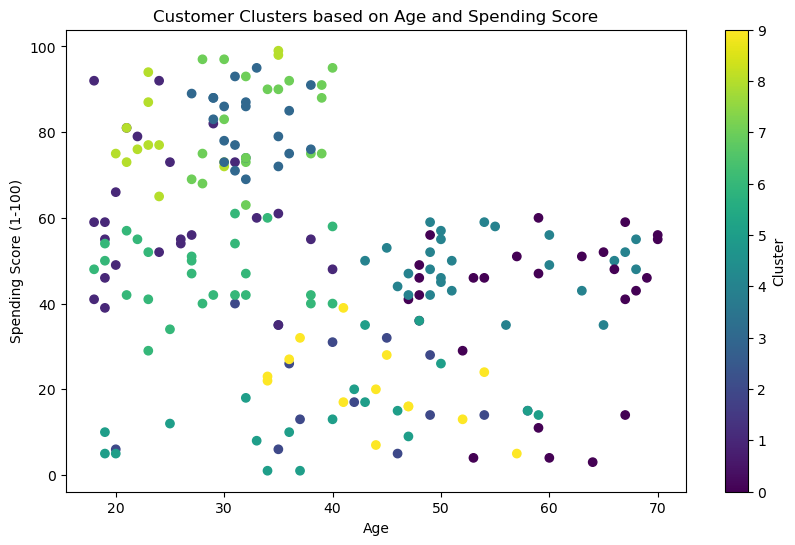

In [75]:
# Visualize the cluster
# Plot two features, such as 'Age' and 'Spending Score', colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters based on Age and Spending Score')
plt.colorbar(label='Cluster')
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for k={k}: {score}')

Silhouette Score for k=10: 0.42076374869477745


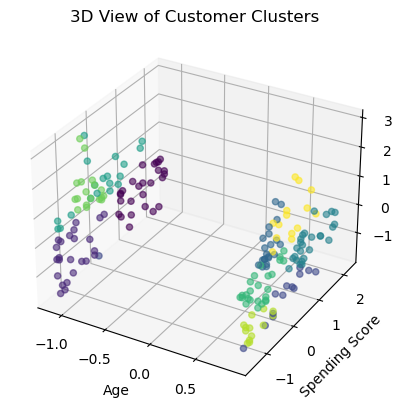

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=kmeans.labels_, cmap='viridis', alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D View of Customer Clusters')
plt.show()
